In [13]:
!pip install sklearn

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, classification_report
from Models.functions.utils import listProblems
from Models.functions.plot import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

ImportError: DLL load failed: Não foi possível encontrar o procedimento especificado.

In [3]:
from pprint import pprint

In [8]:
reports = dict(
    baseline1 = '../baseline1/Reports_v2_balanced/',
    baseline2 = '../baseline2/Reports/',
    baseline3 = '../baseline3/Reports/',
    baseline3_1_1 = '../baseline3/Reports1.1/',
    baseline3_grid = '../baseline3/Reports_grid/',
    baseline4 = '../baseline4/Reports_grid/'
    baseline5 = '../baseline5/Reports_grid/'
)

SyntaxError: invalid syntax (<ipython-input-8-8fdc27c23d82>, line 8)

In [20]:
import os

In [21]:
!ls {baseline3}'/gender/b5post'

ls: cannot access '{baseline3}/gender/b5post': No such file or directory


In [4]:
def get_metrics(exp, pred): return f1_score(np.load(exp), np.load(pred), average="macro")
def get_metrics2(exp, pred): return f1_score(exp, pred, average="macro")
    
def get_baseline1(task, dataset_name, lang):    
    baseline1 = reports['baseline1']
    bar = '/' 
    lang2 = '_'+lang
    
    exp  = baseline1 + task +bar+ dataset_name +lang2+bar+'expected_y.numpy.npy'
    pred = baseline1 + task +bar+ dataset_name +lang2+bar+'predicted_y.numpy.npy'
    
    return get_metrics(exp, pred)

def get_baseline2(task, dataset_name, lang, v = 1):    
    baseline2 = reports['baseline2']
    bar = '/' 
    lang2 = '_'+lang if v == 1 else ''
    
    if os.path.exists(baseline2 + task +bar+ dataset_name +lang2+bar):
        exp  = baseline2 + task +bar+ dataset_name +lang2+bar+'expected.numpy.npy'
        pred = baseline2 + task +bar+ dataset_name +lang2+bar+'predicted_proba.numpy.npy'
    elif os.path.exists(baseline2 + task +bar+ dataset_name +bar):
        exp  = baseline2 + task +bar+ dataset_name +bar+'expected.numpy.npy'
        pred = baseline2 + task +bar+ dataset_name +bar+'predicted_proba.numpy.npy'
    else:
        exp  = '/tmp/'
        pred = '/tmp/'

    exp, pred = np.load(exp), np.load(pred)

    if type(pred[0]) != np.int64 and len(pred[0]) > 1:        
        pred = np.argmax(pred, axis=1)
    
    return get_metrics2(exp, pred)

def get_baseline3(task, dataset_name, lang):    
    baseline3 = reports['baseline3']
    bar = '/' 
    try:
        exp  = baseline3 + task +bar+ dataset_name +'_'+lang+bar+'expected.numpy.npy'
        pred = baseline3 + task +bar+ dataset_name +'_'+lang+bar+'predicted.numpy.npy'
        f1 = get_metrics(exp, pred)        
    except:
        f1 = 0
    
    return f1

def get_baseline4(task, dataset_name, lang):    
    baseline3 = reports['baseline4']
    bar = '/' 
    try:
        exp  = baseline3 + task +bar+ dataset_name +'_'+lang+bar+'expected.numpy.npy'
        pred = baseline3 + task +bar+ dataset_name +'_'+lang+bar+'predicted.numpy.npy'
        f1 = get_metrics(exp, pred)
    except:
        f1 = 0
    
    return f1

def get_baseline5(task, dataset_name, lang):    
    baseline = reports['baseline5']
    bar = '/' 
    try:
        exp  = baseline + task +bar+ dataset_name +'_'+lang+bar+'expected.numpy.npy'
        pred = baseline + task +bar+ dataset_name +'_'+lang+bar+'predicted.numpy.npy'
        f1 = get_metrics(exp, pred)
    except:
        f1 = 0
    
    return f1

In [5]:
def check(dataset_name, task,v=1):
    """
    params: task
    return: dataframe
    """
    results = pd.DataFrame({'dataset': [], 'lang': [], 'task': [], 
                            'baseline1': [], 
                            'baseline2': [], 
                            'baseline3': [],'baseline4': [], 'baseline5': []})
    
    for p in listProblems(filter_dataset_name = dataset_name, filter_task = task):
        bar = '/'
        task = p[0]
        dataset_name = p[1]
        lang = p[2]
        
        d = {
            'idx': dataset_name+'_'+task+'_'+lang,
            'dataset': dataset_name,
            'lang': lang,
            'task': task,
            'baseline1': get_baseline1(task, dataset_name, lang),
            'baseline2': get_baseline2(task, dataset_name, lang),
            'baseline3': get_baseline3(task, dataset_name, lang),
            'baseline4': get_baseline4(task, dataset_name, lang),
            'baseline5': get_baseline5(task, dataset_name, lang)
        }

        results = results.append(d, ignore_index=True)
        
    results = results.set_index('idx')
    return results

### b5post, brmoral, esic, pan13, enblog

In [6]:
df = check('b5post',None,v=1)
df.plot(kind='bar')
display(df)

NameError: name 'pd' is not defined

,baseline1,baseline2,baseline3,baseline3.1.1,baseline3_grid,dataset,lang,task
idx,,,,,,,,
brmoral_gender_pt,0.628077,0.544545,0.428825,0.619549,NaN,brmoral,pt,gender
brmoral_age_pt,0.404076,0.335857,0.365251,0.367091,NaN,brmoral,pt,age
brmoral_religion_pt,0.406396,0.355697,0.321121,0.381611,NaN,brmoral,pt,religion
brmoral_education_pt,0.402892,0.306579,0.353766,0.362151,NaN,brmoral,pt,education
brmoral_it_pt,0.631188,0.596791,0.519444,0.664924,NaN,brmoral,pt,it
brmoral_politics_pt,0.491131,0.377561,0.305791,0.313880,NaN,brmoral,pt,politics


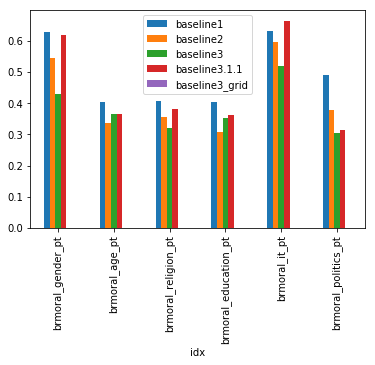

In [25]:
df = check('brmoral',None)
df.plot(kind='bar')#, figsize=(5,5))
display(df)

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                    baseline1  baseline2  baseline3  baseline3.1.1  \
idx                                                                  
esic_gender_pt       0.366509   0.576841   0.502885            0.0   
esic_age_pt          0.580887   0.435316   0.399177            0.0   
esic_education_pt    0.578778   0.472374   0.435546            0.0   
esic_profession_pt   0.533206   0.372463   0.322516            0.0   
esic_region_pt       0.604788   0.277929   0.148619            0.0   
esic_city_pt         0.705607   0.574884   0.576721            0.0   

                    baseline3_grid dataset lang        task  
idx                                                          
esic_gender_pt                 NaN    esic   pt      gender  
esic_age_pt                    NaN    esic   pt         age  
esic_education_pt              NaN    esic   pt   education  
esic_profession_pt             NaN    esic   pt  profession  
esic_region_pt                 NaN    esic   pt      region  
esic_

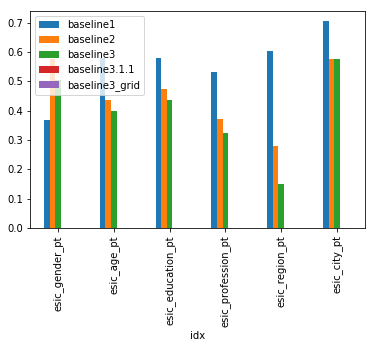

In [26]:
df = check('esic',None)
df.plot(kind='bar')
print(df)

                  baseline1  baseline2  baseline3  baseline3.1.1  \
idx                                                                
enblog_gender_en   0.741315   0.756816   0.734750            0.0   
enblog_age_en      0.715083   0.728921   0.590814            0.0   

                  baseline3_grid dataset lang    task  
idx                                                    
enblog_gender_en             NaN  enblog   en  gender  
enblog_age_en                NaN  enblog   en     age  


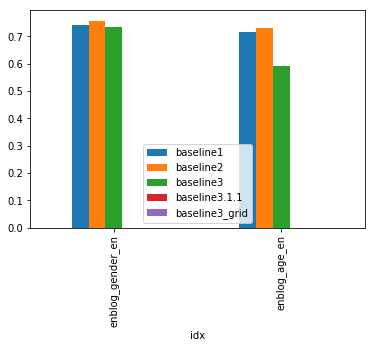

In [27]:
df = check('enblog',None,v=1)
df.plot(kind='bar')#, color=('LightCoral','SkyBlue'))
print(df)

In [1]:
df = check('brblogset',None,v=1)
df.plot(kind='bar')#, color=('LightCoral','SkyBlue'))
display(df)

NameError: name 'check' is not defined

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,baseline1,baseline2,baseline3,baseline3.1.1,baseline3_grid,dataset,lang,task
idx,,,,,,,,
pan13_gender_en,0.575037,0.552429,0.536396,0.0,NaN,pan13,en,gender
pan13_gender_es,0.631629,0.558898,0.535736,0.0,NaN,pan13,es,gender
pan13_age_en,0.504853,0.558206,0.395088,0.0,NaN,pan13,en,age
pan13_age_es,0.554949,0.544507,0.384822,0.0,NaN,pan13,es,age


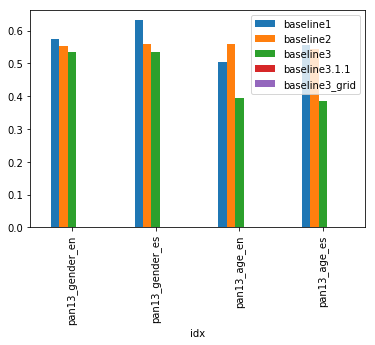

In [28]:
df = check('pan13',None,v=1)
df.plot(kind='bar')#, color=('LightCoral','SkyBlue'))
display(df)

In [29]:
from Models.functions.datasets import loadTrainTest
from sklearn.model_selection import StratifiedKFold

### baselines

- baseline1: TF-IDF e regressão
- baseline2: TF-IDF e CNN
- baseline3: word embeddings e CNN
 - 3.1 Kim Model = online training embeddings + CNN
 - 3.2 Proposed optimized CNN
 - 3.3 Embeddings dim = [100, 300, 600]
 
- baseline4: word embeddings e GRU